In [2]:
import tensorflow as tf

model = tf.keras.models.Sequential([ 
    # First convolution
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    # Second convolution
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    # Third convolution
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    # Fourth convolution
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    
    # 256 neuron hidden layer
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    
    # 
    tf.keras.layers.Dense(5, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 64)        3

In [3]:
from tensorflow.keras.optimizers import Adam

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['acc'])

In [34]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1/255
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory('/Users/davidshatwell/dev/mt0017/dl-project/dataset/train/', 
                                                    target_size=(128, 128), 
                                                    batch_size=128, 
                                                    class_mode='categorical')

# Flow validation images in batches of 128 using train_datagen generator
validation_generator = validation_datagen.flow_from_directory('/Users/davidshatwell/dev/mt0017/dl-project/dataset/dev/', 
                                                              target_size=(128, 128), 
                                                              batch_size=128, 
                                                              class_mode='categorical',
                                                              shuffle=False)

Found 85290 images belonging to 5 classes.
Found 21323 images belonging to 5 classes.


In [5]:
history = model.fit_generator(train_generator,
                              epochs=5,
                              verbose=1,
                              validation_data=validation_generator)

Epoch 1/5
667/667 [==============================] - 815s 1s/step - loss: 0.3682 - acc: 0.8593 - val_loss: 0.1825 - val_acc: 0.9396
Epoch 2/5
667/667 [==============================] - 805s 1s/step - loss: 0.1649 - acc: 0.9440 - val_loss: 0.1466 - val_acc: 0.9493
Epoch 3/5
667/667 [==============================] - 825s 1s/step - loss: 0.1260 - acc: 0.9575 - val_loss: 0.1085 - val_acc: 0.9644
Epoch 4/5
667/667 [==============================] - 834s 1s/step - loss: 0.1044 - acc: 0.9648 - val_loss: 0.0850 - val_acc: 0.9732
Epoch 5/5
667/667 [==============================] - 810s 1s/step - loss: 0.0899 - acc: 0.9692 - val_loss: 0.0966 - val_acc: 0.9673


In [36]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

prediction = model.predict_generator(validation_generator, workers=1)

In [37]:
print(prediction)

y_pred = np.argmax(prediction, axis=1)
y_test = validation_generator.classes

print(y_test)
print(y_pred)

# Results
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[8.9150262e-01 4.2023350e-02 1.7553274e-02 1.8503949e-02 3.0416882e-02]
 [9.9550229e-01 1.7851741e-03 4.8237180e-04 2.1045860e-03 1.2555605e-04]
 [9.9997139e-01 9.9271329e-06 1.5974185e-05 1.7083793e-06 1.0343392e-06]
 ...
 [3.4826528e-04 8.8816832e-06 3.6456701e-03 6.1258950e-05 9.9593592e-01]
 [4.6040768e-05 9.1795124e-07 3.6971361e-04 5.1465131e-06 9.9957818e-01]
 [7.1698021e-05 1.3226089e-06 2.9635703e-04 4.7665280e-06 9.9962580e-01]]
[0 0 0 ... 4 4 4]
[0 0 0 ... 4 4 4]
[[4838    6   80   26   16]
 [  19 3574    2   23    1]
 [  87    1 3980   20   12]
 [ 131   62  122 3495   21]
 [  25    0   28   15 4739]]
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      4966
           1       0.98      0.99      0.98      3619
           2       0.94      0.97      0.96      4100
           3       0.98      0.91      0.94      3831
           4       0.99      0.99      0.99      4807

    accuracy                           0.97     21323

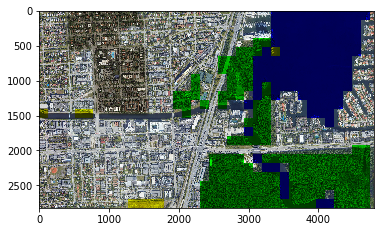

In [15]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Load test image
path = '/Users/davidshatwell/dev/mt0017/ml-project/dataset/test/bosque_ciudad_mar1.jpg'
image = np.array(Image.open(path))
 
image_height = image.shape[0]
image_width = image.shape[1]

subimage_height = 128 
subimage_width = 128

index = 0
for i in range(int(image_height / subimage_height)):
        for j in range(int(image_width / subimage_width)):
            x_start = i * subimage_height
            x_end = (i + 1) * subimage_height
            y_start = j * subimage_width
            y_end = (j + 1) * subimage_width
            
            subimage = image[x_start:x_end, y_start:y_end, :]
            subimage = np.reshape(subimage, (1, 128, 128, 3)) / 255.0
            y_pred = model.predict(subimage)
            
            if np.argmax(y_pred) == 0:
                pass
            elif np.argmax(y_pred) == 1:
                image[x_start:x_end, y_start:y_end, 1] = 0
                image[x_start:x_end, y_start:y_end, 2] = 0
            elif np.argmax(y_pred) == 2:
                image[x_start:x_end, y_start:y_end, 0] = 0
                image[x_start:x_end, y_start:y_end, 2] = 0
            elif np.argmax(y_pred) == 3:
                image[x_start:x_end, y_start:y_end, 2] = 0
            else:
                image[x_start:x_end, y_start:y_end, 0] = 0
                image[x_start:x_end, y_start:y_end, 1] = 0
            
            index += 1
            
            
img = plt.imshow(image)
plt.savefig('cnn_miami.jpg', dpi=400)